In [1]:
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt
import cv2
from functions import *

In [2]:
names = np.array(["before-hit", "0m","30m","1h" ,"3h","12h", "24h", "48h"])

trainName = "3h"

strawberryCube = sp.open_image(getImage(trainName))

n, m, bands = strawberryCube.shape
        
        # 2: 0m: [420,5212,666] 30m: [465 ,5189, 666], 1h: [436,5304,666] , 3h: id2 [376, 5292,666],  
        # 1: 3h: [1348, 5380, 430]
        
strawberryCoords2 = np.array([376, 5292,666])
strawberryCoords1 = np.array([1348, 5380, 600])

img3h2 = getRegion(strawberryCube, strawberryCoords2[0], strawberryCoords2[1], strawberryCoords2[2])
img3h1 = getRegion(strawberryCube, strawberryCoords1[0], strawberryCoords1[1], strawberryCoords1[2])

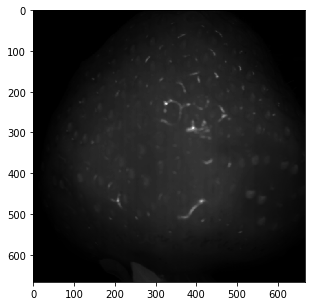

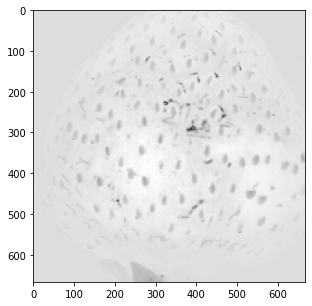

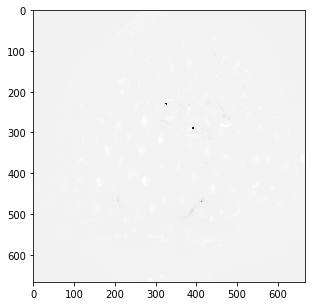

In [3]:
# PCA #

imgPCA, eigenvalues  = PCAreduce(img3h2[:,:,100:], frac=0.999)

#sp.imshow(img3h[:,:,185])

for i in range(imgPCA.shape[2]):
    sp.imshow(imgPCA[:,:,i], figsize=(5,5))


ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.02416541527296835]
    G: [0.0, 0.02416541527296835]
    B: [0.0, 0.02416541527296835]

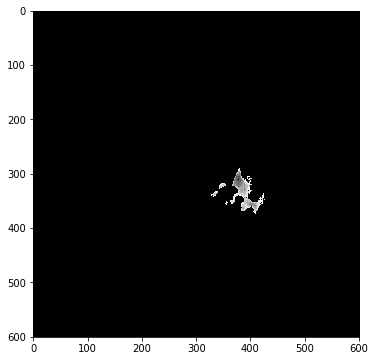

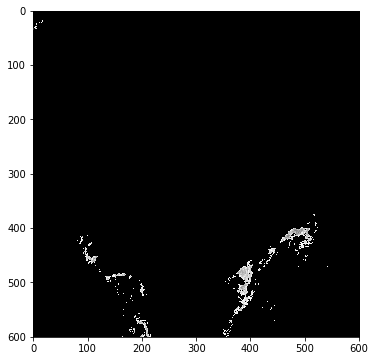

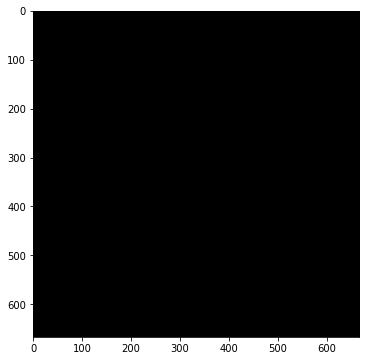

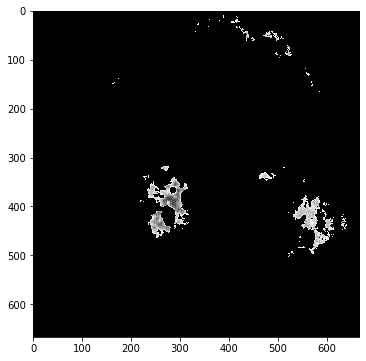

In [4]:
threshold = 130
fig = (6,6)

spectra = np.zeros([2,bands])

spectra[0] = np.array(strawberryCube.read_pixel(5391, 1425))
spectra[1] = np.array(strawberryCube.read_pixel(5343, 322))

angles1 = sp.spectral_angles(img3h1, spectra)
angles1[angles1 > np.pi / (threshold)] = 0
sp.imshow(angles1[:,:,0], figsize=fig)
sp.imshow(angles1[:,:,1], figsize=fig)
    
angles2 = sp.spectral_angles(img3h2, spectra)
angles2[angles2 > np.pi / (threshold)] = 0
sp.imshow(angles2[:,:,0], figsize=fig)
sp.imshow(angles2[:,:,1], figsize=fig)